# Markov Chain Monte Carlo Methods in Julia

**Bayesian Inference of Artificial Neural Networks and Hidden Markov Models Hybrids**<br/>
Al-Ahmadgaid B. Asaad (`alstatr.blogspot.com`; `alasaadstat@gmail.com`)<br/>
<br/><br/>

This notebook meant to provide the source code for the Bayesian Inference of MCMC methods in Chapter 3.

### i. Monte Carlo Simulation
The following codes simulates the monte carlo method by approximating the area under the Gaussian distribution between -1.96 and 1.96.

In [8]:
%pylab inline
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

col, bgcol, grdcol, lty, ticksize = ("#FFA812", "#3B444B", "#848482", "dotted", 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
draws = np.linspace(1000, 100000, 100000/100)
area = np.zeros(np.size(draws))

for i in np.arange(np.size(draws)):
    samples = np.random.normal(size = int(draws[i]))
    area[i] = np.sum((samples > -1.96) & (samples < 1.96)) / np.size(samples)

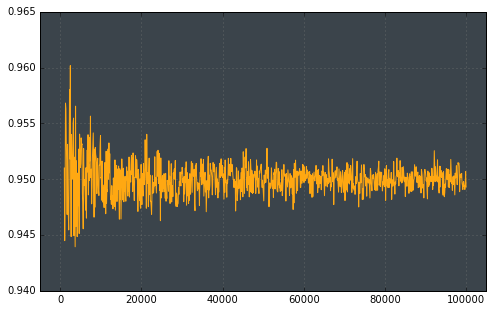

In [3]:
fig, ax = plt.subplots(facecolor = "white", figsize = (8, 5))
ax.plot(draws, area, color = col)
ax.grid("on", which = "major", color = grdcol, linestyle = lty)
ax.set_axis_bgcolor(bgcol)
ax.set_xlim((-5000, 105000))
ax.tick_params(axis = "both", which = "major", labelsize = ticksize)
ax.set_axisbelow("on")

### ii. Metropolis-Hasting

The following codes illustrates the Metropolis-Hasting algorithm by using uniform distribution as the proposal distribution, with target distribution given by univariate Cauchy model.

In [4]:
r = 100000
x = np.zeros(r)
x[0] = 30

for i in np.arange(r - 1):
    proposal = x[i] + np.random.uniform(-1, 1)
    accept = np.random.uniform(-1, 1) < (stats.cauchy.pdf(proposal) / stats.cauchy.pdf(x[i]))

    if accept == True:
        x[i + 1] = proposal
    else:
        x[i + 1] = x[i]

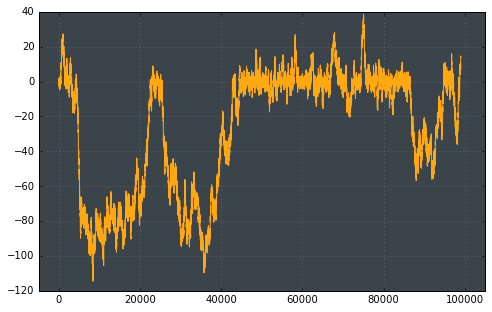

In [5]:
fig, ax = plt.subplots(facecolor = "white", figsize = (8, 5))
ax.plot(x[1000:-1], color = col)
ax.grid("on", which = "major", color = grdcol, linestyle = lty)
ax.set_axis_bgcolor(bgcol)
ax.set_xlim((-5000, 105000))
ax.tick_params(axis = "both", which = "major", labelsize = ticksize)
ax.set_axisbelow("on")

Another example of Metropolis-Hasting algorithm for sampling on bivariate Cauchy distribution

In [6]:
def BvCauchy(x, μ = [0, 0], γ = 1):
    return (1 / (2 * np.pi)) * (γ / ((x[0] - μ[0])**2 + (x[1] - μ[1])**2 + γ**2)**1.5)

x = zeros((2, r))
x[:, 0] = [-100, 100]

for i in np.arange(r - 1):
    proposal = x[:, i] + np.random.uniform(-5, 5, 2)
    accept = np.random.uniform(size = 1) < (BvCauchy(proposal) / BvCauchy(x[:, i]))

    if accept == True:
        x[:, i + 1] = proposal
    else:
        x[:, i + 1] = x[:, i]

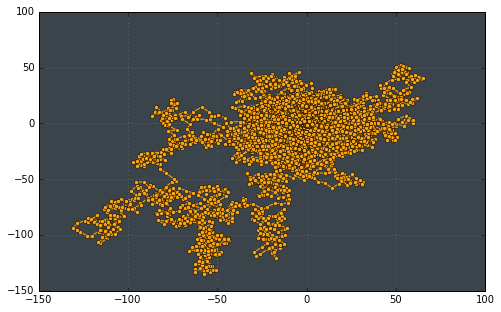

In [7]:
fig, ax = plt.subplots(facecolor = "white", figsize = (8, 5))
ax.plot(x[0, 1000:-1], x[1, 1000:-1], color = col, marker = "o", markersize = 4)
ax.grid("on", which = "major", color = grdcol, linestyle = lty)
ax.set_axis_bgcolor(bgcol)
ax.tick_params(axis = "both", which = "major", labelsize = ticksize)
ax.set_axisbelow("on")

In [8]:
def con_norm(x, μ1 = 10, μ2 = -10, σ1 = 1.5, σ2 = 1.35, ρ = .5):
    return np.random.normal(μ1 + (σ1 / σ2) * ρ * (x - μ2), sqrt((1 - ρ**2) * σ1**2), 1)

x = np.zeros((2, r))

for i in np.arange(r - 1):
    x[0, i + 1] = con_norm(x[1, i])
    x[1, i + 1] = con_norm(x[0, i + 1], -10, 10, 1.35, 1.5)

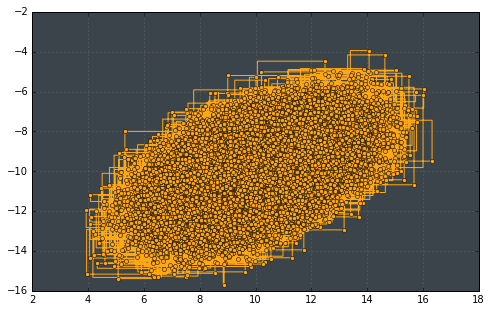

In [9]:
fig, ax = plt.subplots(facecolor = "white", figsize = (8, 5))
ax.step(x[0, 1000:-1], x[1, 1000:-1], where  = "post", color = col, marker = "o", markersize = 4)
ax.grid("on", which = "major", color = grdcol, linestyle = lty)
ax.set_axis_bgcolor(bgcol)
ax.tick_params(axis = "both", which = "major", labelsize = ticksize)
ax.set_axisbelow("on")

## Hamiltonian Monte Carlo Algorithm
The following algorithm is an implementation of the Hamiltonian Monte Carlo

In [10]:
ɛ = .3
τ = 20

U = lambda x, Σ: np.transpose(x).dot(np.linalg.inv(Σ)).dot(x)
dU = lambda x, Σ: np.linalg.inv(Σ).dot(x)

K = lambda p: np.transpose(p).dot(p) / 2
dK = lambda p: p

H = lambda x, p, Σ: U(x, Σ) + K(p)

x = np.zeros((2, r)); x[:, 0] = np.array([0, 6])
Σ = np.array([[1, .8], 
              [.8, 1]])

for n in np.arange(r - 1):
    xNew = x[:, n]
    p = np.random.normal(size = np.size(xNew))
    oldE = H(xNew, p, Σ)
    
    for t in np.arange(τ):
        p = p - (ɛ / 2) * dU(xNew, Σ)
        xNew = xNew + ɛ * dK(p)
        p = p - (ɛ / 2) * dU(xNew, Σ)
    
    newE = H(xNew, p, Σ)
    dE = newE - oldE
    
    if dE < 0:
        x[:, n + 1] = xNew
    elif np.random.uniform() < np.exp(-dE):
        x[:, n + 1] = xNew
    else:
        x[:, n + 1] = x[:, n]

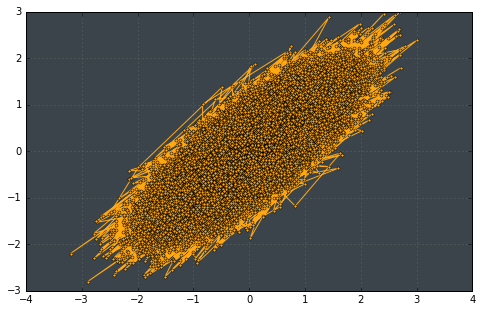

In [11]:
fig, ax = plt.subplots(facecolor = "white", figsize = (8, 5))
ax.plot(x[0, 1000:-1], x[1, 1000:-1], color = col, marker = "o", markersize =3)
ax.grid("on", which = "major", color = grdcol, linestyle = lty)
ax.set_axis_bgcolor(bgcol)
ax.tick_params(axis = "both", which = "major", labelsize = ticksize)
ax.set_axisbelow("on")

In [11]:
?plt.subplots

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data

plt.show()

In [13]:
?plt.hist

In [2]:
import sympy as sy

In [8]:
x, y = sy.symbols("x y")

In [20]:
f = -sy.log(sy.exp(sy.log(x) + sy.log(x**4)))

In [21]:
sy.diff(f, x)

-5/x

In [1]:
import numpy as np

In [2]:
?np.random.random

In [3]:
syn0 = 2*np.random.random((3,1)) - 1

In [6]:
np.mean(syn0)

-0.04144069394034141

In [10]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in np.arange(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print ("Output After Training:")
print (l1)

Output After Training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


In [12]:
l0 = X
a = np.dot(l0,syn0)

In [13]:
nonlin(a)

array([[ 0.009664  ],
       [ 0.00786466],
       [ 0.99358931],
       [ 0.99211997]])